In [48]:
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import *
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [49]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [50]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


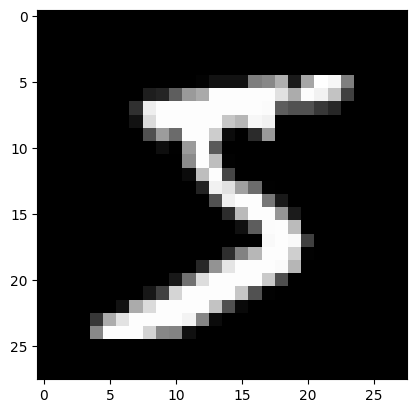

In [51]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [52]:

# Normalize the data between -1 to 1
X_train = (X_train.astype('float32')- 127.5) / 127.5
# Instead of taking mean I am taking the median how and why ?
print(np.median(X_train))
print(np.mean(X_train))
print(np.min(X_train))
print(np.max(X_train))
print(X_train.shape)


-1.0
-0.7386798
-1.0
1.0
(60000, 28, 28)


In [53]:
total_epochs = 50
batch_size = 256
no_of_batches = int(X_train.shape[0]/batch_size) #60000/256
half_batch = int(batch_size/2) # as we will take 128 fake samples
# and 128 real samples , 1 batch will have 256 images
print(no_of_batches)

noise_dim = 100 # We will upsample into 784 dim vector
adam = Adam(learning_rate= 2e-4, beta_1=0.5)

234


In the context of training Generative Adversarial Networks (GANs), normalizing the data to a range between -1 and 1 is essential because it ensures that the inputs to the generator and discriminator models align well with the typical activation function ranges (like tanh). It also helps stabilize the training process.

### Why Use Median Instead of Mean for Normalization?
Normalization traditionally involves centering the data around its **mean**. However, in some cases, using the **median** instead of the mean can be beneficial. Here's why:

1. **Robustness to Outliers:**
   - The mean is sensitive to extreme values or outliers, which can disproportionately shift the data distribution. If your dataset has outliers, normalizing with the mean might lead to less representative transformations.
   - The median, on the other hand, is robust to outliers because it reflects the central tendency of the data without being influenced by extreme values.

2. **Skewed Data Distribution:**
   - If your data distribution is highly skewed (e.g., not symmetric or has long tails), the mean might not represent the "center" of the data effectively.
   - The median provides a better measure of the dataset's central value in such cases.

3. **Special Requirements for Data Characteristics:**
   - Some datasets might naturally benefit from normalization using the median due to the nature of the features (e.g., image pixel intensities that are not uniformly distributed).

### Implications for GAN Training:
When training GANs, the generator's output is often transformed to match the normalized range of the real data. If you normalize using the **median**, the generator will learn to produce outputs that are distributed around the median rather than the mean.

- **Using Mean for Normalization:**
   \[
   X_{\text{normalized}} = \frac{X - \mu}{\sigma} \text{ or } X_{\text{normalized}} = \frac{X - \mu}{\text{range}}
   \]
   where \(\mu\) is the mean.

- **Using Median for Normalization:**
   \[
   X_{\text{normalized}} = \frac{X - \text{median}(X)}{\text{range}}
   \]

The choice between mean and median depends on your dataset and the behavior you expect from the GAN. If the dataset is well-behaved (symmetrical and without outliers), using the mean is standard. For datasets with irregularities, the median might be more appropriate.

### Example of Median Normalization:
```python
import numpy as np

# Sample data
X_train = np.array([0, 10, 255, 127, 128, 129])

# Median normalization
median = np.median(X_train)
X_train_normalized = (X_train.astype('float32') - median) / 127.5

print("Normalized data:", X_train_normalized)
```

By using the median, you're ensuring that the normalization better reflects the data's central tendency under specific conditions. For GANs, this might help in cases where outliers or skewed distributions could otherwise hinder the training process.

Dense layers in a neural network are fully connected layers, meaning each neuron in the layer is connected to every neuron in the previous and subsequent layers. These layers are the fundamental building blocks of most neural networks, especially for tasks where all features of the input data are relevant to the output.

### What Dense Layers Do:
1. **Learn Feature Representations:**
   - Each dense layer extracts higher-level features from the input data. In the generator, these layers progressively transform random noise (latent space) into meaningful data (e.g., an image or other structured output).
   
2. **Transform Data Dimensions:**
   - The output size of a dense layer is determined by the number of neurons, allowing the model to reshape the data as needed for subsequent layers.

3. **Enable Non-Linear Transformations:**
   - When paired with activation functions (like LeakyReLU or tanh), dense layers enable non-linear transformations, making it possible for the network to learn complex patterns.

### Why Use Multiple Dense Layers:
1. **Progressive Feature Refinement:**
   - Each layer adds more capacity to refine the features. Early layers capture general patterns, while deeper layers focus on specific details.

2. **Increasing Model Complexity:**
   - By stacking dense layers, the network gains the ability to learn more complex mappings from input noise to the desired output distribution.

3. **Gradual Upscaling of Dimensions:**
   - In a generator network, the number of neurons often increases in each layer to upsample the latent space, progressively approximating the size of the desired output (e.g., 784 for a flattened 28x28 image).

4. **Flexibility for High-Dimensional Outputs:**
   - Multiple dense layers provide the flexibility to adapt the output space to high-dimensional data structures.

### Why the Output Uses `tanh`:
The `tanh` activation at the output layer ensures the generator's output values are in the range \([-1, 1]\), which matches the normalized input range of the discriminator or real data (as normalized data for GANs is typically scaled between -1 and 1).

### Effect of Increasing the Number of Dense Layers:
1. **Improved Learning Capacity:**
   - More layers allow the network to model more complex functions, which can improve the quality of the generated samples.

2. **Risk of Overfitting:**
   - If the generator has too many parameters relative to the dataset size, it might overfit, producing unrealistic or repetitive outputs.

3. **Increased Computational Complexity:**
   - Adding layers increases the number of parameters, requiring more memory and computation.



- **Input Dimension (`input_dim=noise_dim`)**: Defines the size of the latent space (random noise vector) input.
- **Progressive Expansion (256 → 512 → 1024 → 784):** Increases feature representation to capture more details.
- **Activation Functions (`LeakyReLU`, `tanh`):** Introduce non-linearity to allow for complex mappings.

Using multiple dense layers helps create a more expressive model capable of generating high-quality samples, as each layer contributes to refining the feature representations from noise to the final structured output.

In [54]:
# Generator:  How generator works
# Input Noise (100 dim) and outputs a vector (784 dim)
generator = Sequential()
generator.add(Dense(256, input_dim=noise_dim))
generator.add(LeakyReLU(alpha=0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(alpha=0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(alpha=0.2))
generator.add(Dense(784, activation='tanh')) # at output we use tanh
generator.compile(loss='binary_crossentropy', optimizer=adam)
generator.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 256)                 │          25,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 784)                 │         803,600 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,486,352 (5.67 MB)

 Trainable params: 1,486,352 (5.67 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# step : 1 # Downsampling and training the dicriminator
discriminator = Sequential()
discriminator.add(Dense(512, input_shape=(784,)))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dense(1, activation='sigmoid'))
# binary claSSIFICATION
discriminator.compile(loss='binary_crossentropy', optimizer=adam)
discriminator.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 533,505 (2.04 MB)

 Trainable params: 533,505 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

gettting 0 or 1 , by making predictions in the last output layer , as it is single valued vector

In [56]:
# step - 2
# Freeze the Discriminator when generator is getting trained
# make a new model : combining both models input is generator
# output will be discriminator
# using functional API (keras)

In [57]:
# GAN
discriminator.trainable = False # Frozen
gan_input = Input((noise_dim,)) # act as place holder
generated_img = generator(gan_input) # generator take the input
gan_output = discriminator(generated_img) # generated image is passed
# through the discrimiator

# Functional API
model = Model(gan_input, gan_output)
model.compile(loss='binary_crossentropy', optimizer=adam)
model.summary()


Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 784)                 │       1,486,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_3 (Sequential)            │ (None, 1)                   │         533,505 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,019,857 (7.71 MB)

 Trainable params: 1,486,352 (5.67 MB)

 Non-trainable params: 533,505 (2.04 MB)

In [58]:
X_train = X_train.reshape(X_train.shape[0], 784)

In [65]:
# Training loop
for epoch in range(total_epochs):
  epoch_discriminator_loss = 0.0
  epoch_generator_loss = 0.0
  for step in range(no_of_batches):
      # step - 1 Discriminator
      # 50 % Real Data + 50 % Fake data
# real data
      idx = np.random.randint(0, X_train.shape[0], half_batch)
      real_imgs = X_train[idx]
      # Reshape real images to (batch_size, 784)
      real_imgs = real_imgs.reshape(half_batch, 784) # Reshape for discriminator

# fake data
      noise = np.random.normal(0, 1, (half_batch, noise_dim))
      fake_imgs = generator.predict(noise) # forward pass
      # get some images for discriminator
    #Labels
      real_labels = np.ones((half_batch, 1))*0.9 # one side label soothing for discriminator
      fake_labels = np.zeros((half_batch, 1))
      # Train our Dicriminator
      discriminator_loss_real = discriminator.train_on_batch(real_imgs, real_labels)
      discriminator_loss_fake = discriminator.train_on_batch(fake_imgs, fake_labels)
      discriminator_loss = 0.5 * np.add(discriminator_loss_real, discriminator_loss_fake)
      epoch_discriminator_loss += discriminator_loss

# step 2 : frozen discriminator  Train Generator
      noise = np.random.normal(0, 1, (batch_size, noise_dim))
      ground_truth_labels = np.ones((batch_size, 1))
      generator_loss = model.train_on_batch(noise, ground_truth_labels)
      epoch_generator_loss += generator_loss[0] if isinstance(generator_loss, (list, tuple)) else generator_loss

  print("Epoch %d Disc loss %.4f Generator loss %.4f" %((epoch+1), epoch_discriminator_loss/no_of_batches, epoch_generator_loss/no_of_batches))
  if (epoch+1) % 10 == 0:
    generator.save('model/gan_generator_{0}.h5'.format(epoch+1))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


KeyboardInterrupt: 

**One-sided label smoothing** is a technique used in training Generative Adversarial Networks (GANs), particularly for the **discriminator**. Here's an explanation of why and how it's used:

---

### **What is Label Smoothing?**
Label smoothing involves modifying the target labels during training to prevent the model from becoming overly confident in its predictions. Instead of using hard labels (e.g., `1` for real and `0` for fake), smoothed labels might be adjusted as follows:
- Real labels (`1`) → Smoothed to a range like `0.9` or `0.8`.
- Fake labels (`0`) → Remain unchanged as `0`.

This is called **one-sided label smoothing** because only the real labels are smoothed, not the fake ones.

---

### **Why One-Sided Label Smoothing for the Discriminator?**
1. **Prevent Overconfidence:**
   - Without smoothing, the discriminator may become overly confident in distinguishing real from fake samples. This can lead to unstable training and hinder the generator from improving.

2. **Encourage Generalization:**
   - Label smoothing regularizes the discriminator, forcing it to be less certain about the real samples. This helps the discriminator generalize better to unseen data rather than memorizing the training data.

3. **Stabilize GAN Training:**
   - GANs are inherently unstable due to the adversarial nature of their loss functions. Overconfident discriminators can overpower the generator, causing the generator's gradients to vanish. Smoothing real labels helps maintain a balance between the generator and discriminator.

4. **Prevent Exploitation of Flaws:**
   - A perfect discriminator would always predict `1` for real and `0` for fake, leaving no room for improvement for the generator. Label smoothing makes the discriminator slightly less perfect, giving the generator a chance to exploit and improve.

5. **Gradient Behavior:**
   - Smoothing modifies the gradients of the discriminator's loss function, preventing them from becoming too large or erratic. This helps in stabilizing updates to the generator.

---

### **Why Not Smooth Fake Labels?**
- Smoothing fake labels (`0 → 0.1`) could make it easier for the generator to fool the discriminator. This could destabilize training, as the generator might exploit this weakness excessively, leading to mode collapse or poor-quality outputs.

By only smoothing the real labels, we allow the discriminator to remain strict with fake samples while being slightly lenient with real samples, creating a better training dynamic.

---

### **How One-Sided Label Smoothing is Applied:**
In practice, during the training of the discriminator:
1. When training on **real samples**, the target label is set to `0.9` (instead of `1`).
2. When training on **fake samples**, the target label remains `0`.

---

### **Mathematical Intuition:**
For a discriminator trained with binary cross-entropy loss:
- Without label smoothing:
  \[
  \text{Loss} = -\frac{1}{N} \sum_{i=1}^N [y_i \log D(x_i) + (1 - y_i) \log (1 - D(x_i))]
  \]
  Where \(y_i\) is the true label (\(1\) for real, \(0\) for fake).

- With one-sided label smoothing (\(y_i = 0.9\) for real samples):
  \[
  \text{Loss for real samples} = -\frac{1}{N} \sum_{i=1}^N [0.9 \log D(x_i) + 0.1 \log (1 - D(x_i))]
  \]
  This modifies the gradient updates, making the discriminator less aggressive.

---

### **Benefits of One-Sided Label Smoothing:**
- Improves training stability.
- Balances the generator and discriminator training.
- Reduces overconfidence in the discriminator.
- Encourages the generator to produce better-quality samples.

By subtly handicapping the discriminator on real samples, one-sided label smoothing helps maintain a competitive yet cooperative dynamic between the generator and discriminator, crucial for GAN success.

Implementing a **Generative Adversarial Network (GAN)** involves two main steps because GANs consist of two adversarial components: the **generator** and the **discriminator**. These components are trained alternately, and the freezing of one component is critical to maintain the adversarial balance.

---

### **Two Steps to Implement GANs**

1. **Train the Discriminator:**
   - The discriminator's job is to classify whether an input is real (from the dataset) or fake (produced by the generator).
   - During this step:
     - The generator is **frozen** (its weights are not updated).
     - The discriminator is updated using:
       - Real samples labeled as `1` (or slightly smoothed like `0.9`).
       - Fake samples from the generator labeled as `0`.

2. **Train the Generator:**
   - The generator's job is to produce fake samples that are realistic enough to fool the discriminator.
   - During this step:
     - The discriminator is **frozen** (its weights are not updated).
     - The generator is updated using the discriminator's feedback. The loss function for the generator typically uses the discriminator's prediction, encouraging it to produce samples the discriminator labels as `1`.

---

### **When and Why They Are Frozen**

**Freezing One Component at a Time:**
- **Why?**
  - If both the generator and discriminator are updated simultaneously, the adversarial feedback loop breaks. For instance:
    - The generator might adjust based on a discriminator that’s also actively adjusting, leading to instability.
    - This could result in oscillations or mode collapse (the generator producing limited or nonsensical outputs).
- **How?**
  - During the discriminator's training, the generator's parameters are frozen so that only the discriminator learns to classify real vs. fake.
  - During the generator's training, the discriminator's parameters are frozen, and its predictions are treated as a static "critic" to guide the generator.

---

### **Overall Workflow of GAN Training**
1. **Step 1: Train Discriminator**
   - Pass real samples (with label `1`) and fake samples from the generator (with label `0`) to the discriminator.
   - Compute the discriminator loss and update its weights.
   - Freeze the generator during this step.

2. **Step 2: Train Generator**
   - Generate fake samples and pass them through the discriminator.
   - Compute the generator loss (e.g., how well it fools the discriminator into predicting `1` for fake samples).
   - Update the generator weights using the discriminator's feedback.
   - Freeze the discriminator during this step.

---

### **Key Notes:**
- **Batch-wise Alternation:** In most implementations, these steps are alternated at the granularity of batches. For example:
  - Train the discriminator for one or a few batches.
  - Then train the generator for one or a few batches.
- **Number of Steps:** In some cases, the discriminator is trained for more steps per batch than the generator, especially early in training, to ensure it becomes a strong critic.

Freezing one component at a time ensures stable adversarial training, where the generator improves without destabilizing the discriminator and vice versa.

In [66]:
NUM_EPOCHS = 50
BATCH_SIZE = 256
NO_OF_BATCHES = math.ceil(X_Train.shape[0]/float(BATCH_SIZE))
HALF_BATCH_SIZE = int(BATCH_SIZE/2)

NOISE_DIM = 100

adam = Adam(lr=2e-4,beta_1=0.5)
#Upsampling
# Start from 7 X 7 X 128
generator = Sequential()
generator.add(Dense(7*7*128,input_shape=(NOISE_DIM,)))
generator.add(Reshape((7,7,128)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

#Double the Activation Size 14 X 14 X 64
generator.add(UpSampling2D())
generator.add(Conv2D(64,kernel_size=(5,5),padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

# Double the Activation Size 28 X 28 X 1
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=(5, 5), padding='same', activation='tanh'))

# Final Output (No ReLu or Batch Norm)
generator.compile(loss='binary_crossentropy', optimizer=adam)
generator.summary()



#Discriminator - Downsampling
discriminator = Sequential()
discriminator.add(Conv2D(64,(5,5),strides=(2,2),padding='same',input_shape=(28,28,1)))
discriminator.add(LeakyReLU(0.2))

# Prefer Strided Convolutions over MaxPooling
discriminator.add(Conv2D(128,(5,5),strides=(2,2),padding='same'))
discriminator.add(LeakyReLU(0.2))


discriminator.add(Flatten())
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

#Functional API
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

def save_imgs(epoch,samples=100):
    noise = np.random.normal(0,1,size=(samples,NOISE_DIM))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples,28,28)

    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()




!mkdir images


X_Train.shape

(60000, 28, 28, 1)

for epoch in range(NUM_EPOCHS):
    epoch_d_loss = 0.
    epoch_g_loss = 0.

    for step in range(NO_OF_BATCHES):
        #randomly select 50% real images
        idx = np.random.randint(0,X_Train.shape[0],HALF_BATCH_SIZE)
        real_imgs = X_Train[idx]

        # generate 50% random images
        noise = np.random.normal(0,1,size=(HALF_BATCH_SIZE,NOISE_DIM))
        fake_imgs = generator.predict(noise)


        # one sided label smoothing
        real_y = np.ones((HALF_BATCH_SIZE,1))*0.9 #Label Smoothing, Works well in practice
        fake_y = np.zeros((HALF_BATCH_SIZE,1))

        # train on real and fake images
        d_loss_real = discriminator.train_on_batch(real_imgs,real_y) #updates the weights of discriminator
        d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y)
        d_loss = 0.5*d_loss_real + 0.5*d_loss_fake

        epoch_d_loss += d_loss


        #Train Generator (Complete Model Generator + Frozen Discriminator)

        noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
        real_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise,real_y)
        epoch_g_loss += g_loss

    print("Epoch %d D loss: %f G loss: %f" % ((epoch + 1), epoch_d_loss, epoch_g_loss))

    if (epoch+1)%10==0:
        generator.save('models/gan_generator_{0}.h5'.format(epoch+1))
        save_imgs(epoch)


NameError: name 'math' is not defined